In [1]:
#!pip install yfinance
#!pip install pandas-ta

In [2]:
import requests
import bs4 as bs
import pickle

import datetime as dt
import os

import pandas as pd
import pandas_datareader.data as pdr
import pandas_ta as ta

import numpy as np

import math

import yfinance as yf



In [3]:
import sklearn

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, KBinsDiscretizer
#import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# GET THE TRADING DATA

In [6]:
#SPX500 data

df_analisys = yf.download('^GSPC',period="2000d", interval="1d")
#df_analisys = yf.download('^GSPC', interval="5m", start="2022-02-16", end="2022-03-03")

df_analisys = df_analisys.reset_index()

print(df_analisys.shape)
df_analisys

[*********************100%***********************]  1 of 1 completed
(2000, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-28,1850.069946,1866.630005,1850.069946,1857.619995,1857.619995,2955520000
1,2014-03-31,1859.160034,1875.180054,1859.160034,1872.339966,1872.339966,3274300000
2,2014-04-01,1873.959961,1885.839966,1873.959961,1885.520020,1885.520020,3336190000
3,2014-04-02,1886.609985,1893.170044,1883.790039,1890.900024,1890.900024,3131660000
4,2014-04-03,1891.430054,1893.800049,1882.650024,1888.770020,1888.770020,3055600000
...,...,...,...,...,...,...,...
1995,2022-03-01,4363.140137,4378.450195,4279.540039,4306.259766,4306.259766,4679400000
1996,2022-03-02,4322.560059,4401.479980,4322.560059,4386.540039,4386.540039,4409090000
1997,2022-03-03,4401.310059,4416.779785,4345.560059,4363.490234,4363.490234,4062080000
1998,2022-03-04,4342.120117,4342.120117,4284.979980,4328.870117,4328.870117,4558250000


In [7]:
df_analisys.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [87]:
# SAVING POINT

DIR_OUTPUTS = r'C:\Users\willi\Documents\EJERCICIOS\TRADING\outputs/'

df_analisys.to_pickle(DIR_OUTPUTS + 'df_spx500_1d_raw' + '.pkl')
print(df_analisys.shape)

(2000, 13)


In [9]:
#df_analisys[ (df_analisys['Datetime']>=dt.datetime(2022,3,3,15,30))]

# Candles computations

In [10]:
#Fixes the trading date
#df_analisys['Datetime'] = df_analisys['Datetime'].dt.tz_localize(None)
#df_analisys['Datetime']

In [11]:
df_analisys['date'] = df_analisys['Date'].apply(lambda x: x.date())
df_analisys['date']

0       2014-03-28
1       2014-03-31
2       2014-04-01
3       2014-04-02
4       2014-04-03
           ...    
1995    2022-03-01
1996    2022-03-02
1997    2022-03-03
1998    2022-03-04
1999    2022-03-07
Name: date, Length: 2000, dtype: object

In [12]:
#Computes body sizes

df_analisys['body_size'] = df_analisys['Close'] - df_analisys['Open']
df_analisys['abs_body_size'] = abs(df_analisys['body_size'])
df_analisys['upper_tail_size'] = df_analisys['High'] - df_analisys[['Open','Close']].max(axis=1)
df_analisys['lower_tail_size'] = df_analisys[['Open','Close']].min(axis=1) - df_analisys['Low']

df_analisys[0:50]

,Date,Open,High,Low,Close,Adj Close,Volume,date,body_size,abs_body_size,upper_tail_size,lower_tail_size
0,2014-03-28,1850.069946,1866.630005,1850.069946,1857.619995,1857.619995,2955520000,2014-03-28,7.550049,7.550049,9.010010,0.000000
1,2014-03-31,1859.160034,1875.180054,1859.160034,1872.339966,1872.339966,3274300000,2014-03-31,13.179932,13.179932,2.840088,0.000000
2,2014-04-01,1873.959961,1885.839966,1873.959961,1885.520020,1885.520020,3336190000,2014-04-01,11.560059,11.560059,0.319946,0.000000
3,2014-04-02,1886.609985,1893.170044,1883.790039,1890.900024,1890.900024,3131660000,2014-04-02,4.290039,4.290039,2.270020,2.819946
4,2014-04-03,1891.430054,1893.800049,1882.650024,1888.770020,1888.770020,3055600000,2014-04-03,-2.660034,2.660034,2.369995,6.119995
5,2014-04-04,1890.250000,1897.280029,1863.260010,1865.089966,1865.089966,3583750000,2014-04-04,-25.160034,25.160034,7.030029,1.829956
6,2014-04-07,1863.920044,1864.040039,1841.479980,1845.040039,1845.040039,3801540000,2014-04-07,-18.880005,18.880005,0.119995,3.560059
7,2014-04-08,1845.479980,1854.949951,1837.489990,1851.959961,1851.959961,3721450000,2014-04-08,6.479980,6.479980,2.989990,7.989990
8,2014-04-09,1852.640015,1872.430054,1852.380005,1872.180054,1872.180054,3308650000,2014-04-09,19.540039,19.540039,0.250000,0.260010
9,2014-04-10,1872.280029,1872.530029,1830.869995,1833.079956,1833.079956,3758780000,2014-04-10,-39.200073,39.200073,0.250000,2.209961


In [13]:
#Computes candles color
df_analisys['body_disposal']=None
df_analisys.loc[df_analisys['body_size']>0,'body_disposal'] = 1
df_analisys.loc[df_analisys['body_size']<0,'body_disposal'] = 0

print(df_analisys['body_disposal'].value_counts(dropna=False).reset_index().sort_values(['index'],ascending = True))




   index  body_disposal
1    0.0            918
0    1.0           1081
2    NaN              1


# Target signal

In [161]:
#Computes Target signal

nro_rows = len(df_analisys)
for i in range(0,nro_rows):
    
    profit_threshold = 60
    
    try:
        #Searches for the after indexes where the profit threshold is fullfilled 
        s_threshold = ((df_analisys['Close'][i] - df_analisys['Close'].iloc[i+1:]).abs() > profit_threshold)
        idxs = s_threshold[s_threshold].index
        
        try:
            target_idx = [min(idxs)]
        except:
            target_idx = []
        
        df_data = df_analisys.iloc[target_idx]

        date = df_analisys['date'][i]

        keepcols = ['date','Close']
        df_data = df_data[keepcols]

        dic_rencols = {
            'date':'target_date',
            'Close': 'target_close',
        }

        df_data = df_data.rename(columns=dic_rencols)
        df_data['date'] = date

        if i == 0:
            df_target =df_data.copy()
        else:
            df_target =df_target.append(df_data).copy()
            
    except:
        pass
        
df_target = df_target.reset_index(drop=True)
df_target

,target_date,target_close,date
0,2014-05-29,1920.030029,2014-03-28
1,2014-06-05,1940.459961,2014-03-31
2,2014-04-11,1815.689941,2014-04-01
3,2014-04-11,1815.689941,2014-04-02
4,2014-04-11,1815.689941,2014-04-03
...,...,...,...
1994,2022-03-01,4306.259766,2022-02-28
1995,2022-03-02,4386.540039,2022-03-01
1996,2022-03-07,4201.089844,2022-03-02
1997,2022-03-07,4201.089844,2022-03-03


In [162]:
df_analisys_01 = pd.merge(df_analisys,
                         df_target,
                         on = ['date'],
                         how = 'left').copy()

#Computes the target difference in closure prices
df_analisys_01['target_difference'] =  round( df_analisys_01['target_close'] - df_analisys_01['Close'] )

print(df_analisys.shape)
print(df_analisys_01.shape)

print(df_analisys_01['target_difference'].value_counts(dropna=False).reset_index().sort_values(['index'],ascending = True))

df_analisys_01

(2000, 13)
(2000, 16)
     index  target_difference
159 -325.0                  1
154 -277.0                  1
157 -261.0                  1
131 -230.0                  1
145 -226.0                  1
..     ...                ...
162  183.0                  1
164  193.0                  1
161  210.0                  1
158  230.0                  1
166    NaN                  1

[167 rows x 2 columns]


,Date,Open,High,Low,Close,Adj Close,Volume,date,body_size,abs_body_size,upper_tail_size,lower_tail_size,body_disposal,target_date,target_close,target_difference
0,2014-03-28,1850.069946,1866.630005,1850.069946,1857.619995,1857.619995,2955520000,2014-03-28,7.550049,7.550049,9.010010,0.000000,1,2014-05-29,1920.030029,62.0
1,2014-03-31,1859.160034,1875.180054,1859.160034,1872.339966,1872.339966,3274300000,2014-03-31,13.179932,13.179932,2.840088,0.000000,1,2014-06-05,1940.459961,68.0
2,2014-04-01,1873.959961,1885.839966,1873.959961,1885.520020,1885.520020,3336190000,2014-04-01,11.560059,11.560059,0.319946,0.000000,1,2014-04-11,1815.689941,-70.0
3,2014-04-02,1886.609985,1893.170044,1883.790039,1890.900024,1890.900024,3131660000,2014-04-02,4.290039,4.290039,2.270020,2.819946,1,2014-04-11,1815.689941,-75.0
4,2014-04-03,1891.430054,1893.800049,1882.650024,1888.770020,1888.770020,3055600000,2014-04-03,-2.660034,2.660034,2.369995,6.119995,0,2014-04-11,1815.689941,-73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022-03-01,4363.140137,4378.450195,4279.540039,4306.259766,4306.259766,4679400000,2022-03-01,-56.880371,56.880371,15.310059,26.719727,0,2022-03-02,4386.540039,80.0
1996,2022-03-02,4322.560059,4401.479980,4322.560059,4386.540039,4386.540039,4409090000,2022-03-02,63.979980,63.979980,14.939941,0.000000,1,2022-03-07,4201.089844,-185.0
1997,2022-03-03,4401.310059,4416.779785,4345.560059,4363.490234,4363.490234,4062080000,2022-03-03,-37.819824,37.819824,15.469727,17.930176,0,2022-03-07,4201.089844,-162.0
1998,2022-03-04,4342.120117,4342.120117,4284.979980,4328.870117,4328.870117,4558250000,2022-03-04,-13.250000,13.250000,0.000000,43.890137,0,2022-03-07,4201.089844,-128.0


In [163]:
df_varbins = df_analisys_01[['target_difference']]
df_varbins['target_bins'] = pd.qcut(df_varbins['target_difference'], 20, duplicates='drop')
df_varbins['target_bins'] = df_varbins['target_bins'].cat.codes.apply(lambda x: "{:02d}".format(x+1)) + '-' + df_varbins['target_bins'].astype(str)

print(df_varbins['target_bins'].value_counts(dropna=False).reset_index().sort_values(['index']))

                    index  target_bins
20                 00-nan            1
8   01-(-325.001, -114.1]          100
7      02-(-114.1, -97.0]          101
5       03-(-97.0, -85.0]          113
16      04-(-85.0, -77.0]           88
3       05-(-77.0, -70.0]          115
2       06-(-70.0, -66.0]          119
10      07-(-66.0, -63.0]           97
18      08-(-63.0, -61.0]           72
6        09-(-61.0, 60.0]          103
1         10-(60.0, 61.0]          129
9         11-(61.0, 62.0]           98
17        12-(62.0, 63.0]           73
0         13-(63.0, 65.0]          158
19        14-(65.0, 66.0]           58
4         15-(66.0, 68.0]          114
14        16-(68.0, 70.0]           90
15        17-(70.0, 73.0]           90
13        18-(73.0, 77.0]           90
12        19-(77.0, 85.0]           94
11       20-(85.0, 230.0]           97


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [164]:
#Computes the target difference in transcurred time
df_analisys_01['target_date_diff'] =  df_analisys_01['target_date'] - df_analisys_01['date']
df_analisys_01['target_date_diff'] = df_analisys_01['target_date_diff'] / np.timedelta64(1,'D')

df_analisys_01

,Date,Open,High,Low,Close,Adj Close,Volume,date,body_size,abs_body_size,upper_tail_size,lower_tail_size,body_disposal,target_date,target_close,target_difference,target_date_diff
0,2014-03-28,1850.069946,1866.630005,1850.069946,1857.619995,1857.619995,2955520000,2014-03-28,7.550049,7.550049,9.010010,0.000000,1,2014-05-29,1920.030029,62.0,62.0
1,2014-03-31,1859.160034,1875.180054,1859.160034,1872.339966,1872.339966,3274300000,2014-03-31,13.179932,13.179932,2.840088,0.000000,1,2014-06-05,1940.459961,68.0,66.0
2,2014-04-01,1873.959961,1885.839966,1873.959961,1885.520020,1885.520020,3336190000,2014-04-01,11.560059,11.560059,0.319946,0.000000,1,2014-04-11,1815.689941,-70.0,10.0
3,2014-04-02,1886.609985,1893.170044,1883.790039,1890.900024,1890.900024,3131660000,2014-04-02,4.290039,4.290039,2.270020,2.819946,1,2014-04-11,1815.689941,-75.0,9.0
4,2014-04-03,1891.430054,1893.800049,1882.650024,1888.770020,1888.770020,3055600000,2014-04-03,-2.660034,2.660034,2.369995,6.119995,0,2014-04-11,1815.689941,-73.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022-03-01,4363.140137,4378.450195,4279.540039,4306.259766,4306.259766,4679400000,2022-03-01,-56.880371,56.880371,15.310059,26.719727,0,2022-03-02,4386.540039,80.0,1.0
1996,2022-03-02,4322.560059,4401.479980,4322.560059,4386.540039,4386.540039,4409090000,2022-03-02,63.979980,63.979980,14.939941,0.000000,1,2022-03-07,4201.089844,-185.0,5.0
1997,2022-03-03,4401.310059,4416.779785,4345.560059,4363.490234,4363.490234,4062080000,2022-03-03,-37.819824,37.819824,15.469727,17.930176,0,2022-03-07,4201.089844,-162.0,4.0
1998,2022-03-04,4342.120117,4342.120117,4284.979980,4328.870117,4328.870117,4558250000,2022-03-04,-13.250000,13.250000,0.000000,43.890137,0,2022-03-07,4201.089844,-128.0,3.0


In [165]:
df_varbins = df_analisys_01[['target_date_diff']]
df_varbins['target_date_bins'] = pd.qcut(df_varbins['target_date_diff'], 20, duplicates='drop')
df_varbins['target_date_bins'] = df_varbins['target_date_bins'].cat.codes.apply(lambda x: "{:02d}".format(x+1)) + '-' + df_varbins['target_date_bins'].astype(str)

print(df_varbins['target_date_bins'].value_counts(dropna=False).reset_index().sort_values(['index']))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


               index  target_date_bins
20            00-nan                 1
0    01-(0.999, 2.0]               163
19     02-(2.0, 3.0]                67
17     03-(3.0, 4.0]                72
1      04-(4.0, 6.0]               163
2      05-(6.0, 7.0]               113
16     06-(7.0, 8.0]                84
18     07-(8.0, 9.0]                68
10    08-(9.0, 11.0]                97
15   09-(11.0, 13.0]                89
4    10-(13.0, 15.0]               105
12   11-(15.0, 17.0]                97
13   12-(17.0, 20.0]                95
11   13-(20.0, 23.0]                97
14   14-(23.0, 27.0]                91
3    15-(27.0, 32.0]               106
5    16-(32.0, 38.0]               100
7    17-(38.0, 49.0]                98
9    18-(49.0, 64.0]                97
8    19-(64.0, 88.0]                98
6   20-(88.0, 190.0]                99


In [166]:
# Computes high time to produce additional categories fo the target

df_varbins = df_varbins.sort_values(['target_date_diff'])
df_varbins = df_varbins[df_varbins.notna().all(axis=1)]
size = round(len(df_varbins)*(0.5))

high_time = df_varbins.iloc[size,:]['target_date_diff']
high_time

15.0

In [167]:
mean_time = df_varbins['target_date_diff'].mode()
print('Mean awaiting time to profit: ', mean_time)

Mean awaiting time to profit:  0    7.0
dtype: float64


In [168]:
#computes the target order movement
df_analisys_01['target_order'] = 'NULL'

df_analisys_01.loc[df_analisys_01['target_difference'] < 0, 'target_order'] = 'SELL'

df_analisys_01.loc[(df_analisys_01['target_difference'] < 0)
                   &(df_analisys_01['target_date_diff'] > high_time), 'target_order'] = 'SELL2'


df_analisys_01.loc[df_analisys_01['target_difference'] > 0, 'target_order'] = 'BUY'

df_analisys_01.loc[(df_analisys_01['target_difference'] > 0)
                   &(df_analisys_01['target_date_diff'] > high_time), 'target_order'] = 'BUY2'


df_analisys_01.loc[abs(df_analisys_01['target_difference']) < profit_threshold, 'target_order'] = 'NULL'

df_analisys_01['target_order_bin'] = 0
df_analisys_01.loc[df_analisys_01['target_order'] == 'BUY', 'target_order_bin'] = 1

print(df_analisys_01['target_order'].value_counts(dropna=False).reset_index().sort_values(['index'],ascending = True))
print(df_analisys_01['target_order_bin'].value_counts(dropna=False).reset_index().sort_values(['index'],ascending = True))


   index  target_order
1    BUY           566
0   BUY2           599
4   NULL             1
2   SELL           455
3  SELL2           379
   index  target_order_bin
0      0              1434
1      1               566


# MACD and EMA indicators

In [169]:
# # Calculate MACD values using the pandas_ta library
df_macd = df_analisys_01.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
df_macd


,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1995,-61.112304,-4.406324,-56.705980
1996,-55.055569,1.320329,-56.375897
1997,-51.521580,3.883454,-55.405034
1998,-50.927364,3.582136,-54.509500


In [170]:
ewm50 = df_analisys_01['Close'].ewm(span=50, adjust=False, min_periods=50).mean()
ewm200 = df_analisys_01['Close'].ewm(span=200, adjust=False, min_periods=200).mean()

df_macd['ewm50'] = ewm50
df_macd['ewm200'] = ewm200

#df_analisys_01['ewm50'] = ewm50
#df_analisys_01['ewm200'] = ewm200

df_analisys_01['diff_ewm50'] = df_analisys_01['Close'] - ewm50
df_analisys_01['diff_ewm200'] = df_analisys_01['Close'] - ewm200

df_analisys_01

,Date,Open,High,Low,Close,Adj Close,Volume,date,body_size,abs_body_size,...,target_close,target_difference,target_date_diff,target_order,target_order_bin,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,diff_ewm50,diff_ewm200
0,2014-03-28,1850.069946,1866.630005,1850.069946,1857.619995,1857.619995,2955520000,2014-03-28,7.550049,7.550049,...,1920.030029,62.0,62.0,BUY2,0,NaN,NaN,NaN,NaN,NaN
1,2014-03-31,1859.160034,1875.180054,1859.160034,1872.339966,1872.339966,3274300000,2014-03-31,13.179932,13.179932,...,1940.459961,68.0,66.0,BUY2,0,NaN,NaN,NaN,NaN,NaN
2,2014-04-01,1873.959961,1885.839966,1873.959961,1885.520020,1885.520020,3336190000,2014-04-01,11.560059,11.560059,...,1815.689941,-70.0,10.0,SELL,0,NaN,NaN,NaN,NaN,NaN
3,2014-04-02,1886.609985,1893.170044,1883.790039,1890.900024,1890.900024,3131660000,2014-04-02,4.290039,4.290039,...,1815.689941,-75.0,9.0,SELL,0,NaN,NaN,NaN,NaN,NaN
4,2014-04-03,1891.430054,1893.800049,1882.650024,1888.770020,1888.770020,3055600000,2014-04-03,-2.660034,2.660034,...,1815.689941,-73.0,8.0,SELL,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022-03-01,4363.140137,4378.450195,4279.540039,4306.259766,4306.259766,4679400000,2022-03-01,-56.880371,56.880371,...,4386.540039,80.0,1.0,BUY,1,-61.112304,-4.406324,-56.705980,-183.798830,-98.226342
1996,2022-03-02,4322.560059,4401.479980,4322.560059,4386.540039,4386.540039,4409090000,2022-03-02,63.979980,63.979980,...,4201.089844,-185.0,5.0,SELL,0,-55.055569,1.320329,-56.375897,-99.459006,-17.767501
1997,2022-03-03,4401.310059,4416.779785,4345.560059,4363.490234,4363.490234,4062080000,2022-03-03,-37.819824,37.819824,...,4201.089844,-162.0,4.0,SELL,0,-51.521580,3.883454,-55.405034,-117.704543,-40.411164
1998,2022-03-04,4342.120117,4342.120117,4284.979980,4328.870117,4328.870117,4558250000,2022-03-04,-13.250000,13.250000,...,4201.089844,-128.0,3.0,SELL,0,-50.927364,3.582136,-54.509500,-146.351144,-74.284701


In [171]:
#Keeps only the data where MACD is available

df_analisys_02 = df_analisys_01[df_macd.notna().all(axis=1)]

#df_macd[df_macd.notna().all(axis=1)]

print(df_analisys_01.shape)
print(df_analisys_02.shape)

df_analisys_02

(2000, 24)
(1801, 24)


,Date,Open,High,Low,Close,Adj Close,Volume,date,body_size,abs_body_size,...,target_close,target_difference,target_date_diff,target_order,target_order_bin,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,diff_ewm50,diff_ewm200
199,2015-01-12,2046.130005,2049.300049,2022.579956,2028.260010,2028.260010,3456460000,2015-01-12,-17.869995,17.869995,...,2088.479980,60.0,31.0,BUY2,0,-1.097660,-4.166270,3.068611,-6.852462,53.899283
200,2015-01-13,2031.579956,2056.929932,2008.250000,2023.030029,2023.030029,4107300000,2015-01-13,-8.549927,8.549927,...,2088.479980,65.0,30.0,BUY2,0,-2.741310,-4.647937,1.906627,-11.608621,48.185031
201,2015-01-14,2018.400024,2018.400024,1988.439941,2011.270020,2011.270020,4378680000,2015-01-14,-7.130005,7.130005,...,2088.479980,77.0,29.0,BUY2,0,-4.935951,-5.474062,0.538111,-22.452214,36.062583
202,2015-01-15,2013.750000,2021.349976,1991.469971,1992.670044,1992.670044,4276720000,2015-01-15,-21.079956,21.079956,...,2063.149902,70.0,7.0,BUY,1,-8.082908,-6.896815,-1.186093,-39.442299,17.288850
203,2015-01-16,1992.250000,2020.459961,1988.119995,2019.420044,2019.420044,4056410000,2015-01-16,27.170044,27.170044,...,2088.479980,69.0,27.0,BUY2,0,-8.322456,-5.709091,-2.613365,-12.194562,43.600653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022-03-01,4363.140137,4378.450195,4279.540039,4306.259766,4306.259766,4679400000,2022-03-01,-56.880371,56.880371,...,4386.540039,80.0,1.0,BUY,1,-61.112304,-4.406324,-56.705980,-183.798830,-98.226342
1996,2022-03-02,4322.560059,4401.479980,4322.560059,4386.540039,4386.540039,4409090000,2022-03-02,63.979980,63.979980,...,4201.089844,-185.0,5.0,SELL,0,-55.055569,1.320329,-56.375897,-99.459006,-17.767501
1997,2022-03-03,4401.310059,4416.779785,4345.560059,4363.490234,4363.490234,4062080000,2022-03-03,-37.819824,37.819824,...,4201.089844,-162.0,4.0,SELL,0,-51.521580,3.883454,-55.405034,-117.704543,-40.411164
1998,2022-03-04,4342.120117,4342.120117,4284.979980,4328.870117,4328.870117,4558250000,2022-03-04,-13.250000,13.250000,...,4201.089844,-128.0,3.0,SELL,0,-50.927364,3.582136,-54.509500,-146.351144,-74.284701


In [172]:
df_varbins = df_analisys_02[['diff_ewm50']]
df_varbins['diff_bins'] = pd.qcut(df_varbins['diff_ewm50'], 20, duplicates='drop')
df_varbins['diff_bins'] = df_varbins['diff_bins'].cat.codes.apply(lambda x: "{:02d}".format(x+1)) + '-' + df_varbins['diff_bins'].astype(str)



print(df_varbins['diff_bins'].value_counts(dropna=False).reset_index().sort_values(['index']))

df_varbins = abs(df_analisys_02[['diff_ewm50']])
print('Absolute mean difference with: ' ,df_varbins.mean())

df_varbins = abs(df_analisys_02[['diff_ewm200']])
print('Absolute mean difference with: ' ,df_varbins.mean())

                      index  diff_bins
0   01-(-717.177, -115.097]         91
9    02-(-115.097, -64.985]         90
18    03-(-64.985, -29.244]         90
2     04-(-29.244, -10.389]         90
1       05-(-10.389, 0.184]         90
17       06-(0.184, 10.503]         90
15       07-(10.503, 19.28]         90
14       08-(19.28, 27.648]         90
16      09-(27.648, 34.773]         90
10       10-(34.773, 40.99]         90
11        11-(40.99, 47.05]         90
13       12-(47.05, 54.516]         90
12      13-(54.516, 61.944]         90
7       14-(61.944, 70.979]         90
8       15-(70.979, 81.867]         90
6       16-(81.867, 96.533]         90
5      17-(96.533, 110.101]         90
4     18-(110.101, 129.925]         90
3     19-(129.925, 157.218]         90
19    20-(157.218, 294.653]         90
Absolute mean difference with:  diff_ewm50    72.136588
dtype: float64
Absolute mean difference with:  diff_ewm200    167.279871
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Data preparation

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Close price info

In [67]:
# Prepares previos close info as input variables

for i in range(0,len(df_analisys_02)):
    #i=2
    
    ###############################################################################################
    nro_close_lag = 100

    if i==0:
        X = df_analisys_02.iloc[-(nro_close_lag + i):,][['Close']]
        date = df_analisys_02.iloc[-1:,]['date'].iloc[0]
    else:
        X = df_analisys_02.iloc[-(nro_close_lag + i):-i,][['Close']]
        date = df_analisys_02.iloc[-(i+1):,]['date'].iloc[0]

    # define standard scaler
    sscaler = StandardScaler()

    # transform data
    X_ss1 = sscaler.fit_transform(X)
    #print(X2)

    # Obtains the df of variables of close lags
    ls_columns = ['ss1_close_' + str(x) for x in range(len(X_ss1),0,-1) ]
    df_ssdata1 = pd.DataFrame(X_ss1.T,columns=ls_columns)
    ###############################################################################################
    
    ###############################################################################################
    #Computes slopes before the last close
    ls_linreg_coefs = []
    
    for j in [3,5,8,13]:
        y = X_ss1[-j:]
        x = np.array([range(0,j)]).reshape(-1,1)


        linreg = LinearRegression()
        
        try:
            linreg.fit(x,y)
            linreg_coef = linreg.coef_[0][0]

            ls_linreg_coefs.append(linreg_coef)
            
        except:
            pass

    ls_columns = ['slope_close_' + str(x) for x in range(0,len(ls_linreg_coefs)) ]

    df_linregcoefs = pd.DataFrame(np.array([ls_linreg_coefs]),columns=ls_columns)
    df_linregcoefs
    ###############################################################################################

    # Joins the ss closes df with the slopes df
    df_close_info = pd.concat([df_ssdata1, df_linregcoefs],axis=1,sort=False)
    df_close_info['date'] = date
    
    if i == 0:
        df_close_info_01 = df_close_info.copy()
    else:
        df_close_info_01 = df_close_info_01.append(df_close_info,sort=False).copy()
        
df_close_info_01 = df_close_info_01.reset_index(drop=True)
df_close_info_01

,ss1_close_100,ss1_close_99,ss1_close_98,ss1_close_97,ss1_close_96,ss1_close_95,ss1_close_94,ss1_close_93,ss1_close_92,ss1_close_91,...,ss1_close_5,ss1_close_4,ss1_close_3,ss1_close_2,ss1_close_1,slope_close_0,slope_close_1,slope_close_2,slope_close_3,date
0,-1.452016,-0.927976,-0.694950,-0.588750,-0.355304,-0.238757,-0.143113,-0.177457,-0.025579,0.032906,...,-1.856975,-1.291973,-1.454195,-1.697846,-2.597147,-0.571476,-0.188622,-0.070650,-0.052200,2022-03-07
1,-1.590228,-1.495590,-0.959709,-0.721417,-0.612817,-0.374096,-0.254915,-0.157110,-0.192231,-0.036921,...,-1.422612,-1.909700,-1.331931,-1.497818,-1.746975,-0.207522,-0.023684,0.088722,-0.048085,2022-03-04
2,-1.522489,-1.598634,-1.503634,-0.965707,-0.726506,-0.617491,-0.377859,-0.258223,-0.160045,-0.195299,...,-1.353005,-1.430378,-1.919325,-1.339350,-1.505871,0.206727,-0.021470,0.108218,-0.051213,2022-03-03
3,-1.310399,-1.528832,-1.605194,-1.509924,-0.970469,-0.730588,-0.621263,-0.380951,-0.260975,-0.162518,...,-2.054013,-1.358867,-1.436460,-1.926796,-1.345173,0.045643,0.084975,0.070074,-0.065114,2022-03-02
4,-1.251913,-1.312990,-1.531695,-1.608152,-1.512763,-0.972637,-0.732457,-0.622996,-0.382384,-0.262259,...,-2.515980,-2.057530,-1.361518,-1.439208,-1.930154,-0.284318,0.178997,-0.007753,-0.103633,2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.072517,0.651718,-0.294481,-1.791017,0.361262,0.327872,-0.386524,NaN,NaN,2015-01-16
1797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.057464,0.674795,-0.185665,-1.546593,-1.110694,NaN,NaN,NaN,2015-01-15
1798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.042479,0.306365,-1.348843,-1.195661,NaN,NaN,NaN,2015-01-14
1799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,-1.000000,NaN,NaN,NaN,NaN,2015-01-13


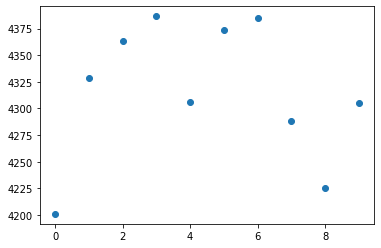

<function matplotlib.pyplot.show(*args, **kw)>

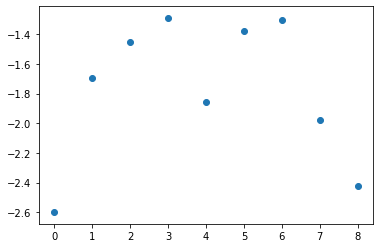

In [68]:
data = df_analisys_02.iloc[-10:,:]['Close'].tolist()
data.reverse()
plt.scatter(range(0,len(data)), data)
plt.show()

data = df_close_info_01.iloc[0,:][['ss1_close_' + str(x) for x in range(1,10) ]]
plt.scatter(range(0,len(data)), data)
plt.show


In [69]:
ls_ss1vars = ['ss1_close_' + str(x) for x in range(100,8,-1)]
ls_ss1vars

ls_ss1vars2 = ['ss1_close_' + str(x) for x in range(8,0,-1) ]
ls_ss1vars2

ls_slopevars = ['slope_close_' + str(x) for x in range(0,4) ]
ls_slopevars

['slope_close_0', 'slope_close_1', 'slope_close_2', 'slope_close_3']

In [70]:
#Assigns correct format to variable to apply transformations
df_close_info_01[ls_ss1vars] = df_close_info_01[ls_ss1vars].astype(float)
df_close_info_01[ls_ss1vars2] = df_close_info_01[ls_ss1vars2].astype(float)
df_close_info_01[ls_slopevars] = df_close_info_01[ls_slopevars].astype(float)

In [71]:
df_close_info_01 = df_close_info_01[df_close_info_01.notna().all(axis=1)]

df_close_info_01[ls_slopevars + ls_ss1vars2 + ls_ss1vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 1701
Columns: 104 entries, slope_close_0 to ss1_close_9
dtypes: float64(104)
memory usage: 1.4 MB


In [72]:
#Defines X vector to all process

X = df_close_info_01[ls_slopevars + ls_ss1vars2 + ls_ss1vars]
print(X.shape)

#y = df_analysis_01[Target_desc]
#y = df_analysis_02[Target_desc + '_coded']
#print(y.shape)

(1702, 104)


In [73]:
# Defines the column trasformer
# This will be the standard schema : start with the pipeline for column transformers and then fit the model

#First a lil pip to treat imputation and scalation in one shot for numerical variables


pca_pip = Pipeline(steps=[('pca',PCA(n_components=3)),])


# Defines the column transformer
rf_transformer = ColumnTransformer([("passthrough", "passthrough", ls_slopevars + ls_ss1vars2),
                                     ("pca1", pca_pip, ls_ss1vars),
                                        ]) 

#Prepares pip
pip = Pipeline([('preprocessing', rf_transformer),])


#Fits the pipeline to the data
Xtr = rf_transformer.fit_transform(X)

#Saves the total procedure
#pickle.dump(kmeans_proc, open( DIRECTORY + 'kmeans_proc.pkl', 'wb'))

In [74]:
Xtr.shape

(1702, 15)

In [75]:
#Defines the df of all transformations

ls_ss1pcavars = ['ss1_close_c1','ss1_close_c2','ss1_close_c3']

df_close_info_tr_01 = pd.DataFrame(Xtr,columns=ls_slopevars + ls_ss1vars2 + ls_ss1pcavars)
print(df_close_info_tr_01.shape)
df_close_info_tr_01

(1702, 15)


,slope_close_0,slope_close_1,slope_close_2,slope_close_3,ss1_close_8,ss1_close_7,ss1_close_6,ss1_close_5,ss1_close_4,ss1_close_3,ss1_close_2,ss1_close_1,ss1_close_c1,ss1_close_c2,ss1_close_c3
0,-0.571476,-0.188622,-0.070650,-0.052200,-1.980557,-1.305276,-1.380651,-1.856975,-1.291973,-1.454195,-1.697846,-2.597147,7.275456,-5.649581,1.813847
1,-0.207522,-0.023684,0.088722,-0.048085,-2.490920,-2.036074,-1.345534,-1.422612,-1.909700,-1.331931,-1.497818,-1.746975,6.651546,-5.802139,1.507399
2,0.206727,-0.021470,0.108218,-0.051213,-1.930161,-2.502764,-2.046182,-1.353005,-1.430378,-1.919325,-1.339350,-1.505871,6.047243,-5.898311,1.271151
3,0.045643,0.084975,0.070074,-0.065114,-1.618088,-1.937663,-2.511893,-2.054013,-1.358867,-1.436460,-1.926796,-1.345173,5.502360,-5.977569,1.109037
4,-0.284318,0.178997,-0.007753,-0.103633,-1.393364,-1.621062,-1.941035,-2.515980,-2.057530,-1.361518,-1.439208,-1.930154,4.987076,-6.043823,0.987367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,0.431196,0.020094,-0.118962,-0.096313,0.844327,0.773463,0.922185,0.315649,0.215501,-0.235328,-0.206386,0.627064,-1.829893,-0.709144,-3.546063
1698,-0.201879,-0.268745,-0.159765,-0.118540,0.705680,0.843876,0.776057,0.918388,0.337916,0.242072,-0.189384,-0.161685,-1.880344,-0.982763,-3.780465
1699,-0.256720,-0.253867,-0.150066,-0.101781,1.123956,0.708489,0.843052,0.777015,0.915606,0.350390,0.257066,-0.163050,-1.902277,-1.216806,-3.891902
1700,-0.323530,-0.157073,-0.116558,-0.079920,1.203446,1.121499,0.713274,0.845491,0.780606,0.916780,0.361418,0.269720,-1.914862,-1.406158,-3.926197


In [76]:
# Concat the Datetime to the transformed data

df_close_info_tr_01 = pd.concat([df_close_info_01['date'],df_close_info_tr_01],axis=1)
df_close_info_tr_01

,date,slope_close_0,slope_close_1,slope_close_2,slope_close_3,ss1_close_8,ss1_close_7,ss1_close_6,ss1_close_5,ss1_close_4,ss1_close_3,ss1_close_2,ss1_close_1,ss1_close_c1,ss1_close_c2,ss1_close_c3
0,2022-03-07,-0.571476,-0.188622,-0.070650,-0.052200,-1.980557,-1.305276,-1.380651,-1.856975,-1.291973,-1.454195,-1.697846,-2.597147,7.275456,-5.649581,1.813847
1,2022-03-04,-0.207522,-0.023684,0.088722,-0.048085,-2.490920,-2.036074,-1.345534,-1.422612,-1.909700,-1.331931,-1.497818,-1.746975,6.651546,-5.802139,1.507399
2,2022-03-03,0.206727,-0.021470,0.108218,-0.051213,-1.930161,-2.502764,-2.046182,-1.353005,-1.430378,-1.919325,-1.339350,-1.505871,6.047243,-5.898311,1.271151
3,2022-03-02,0.045643,0.084975,0.070074,-0.065114,-1.618088,-1.937663,-2.511893,-2.054013,-1.358867,-1.436460,-1.926796,-1.345173,5.502360,-5.977569,1.109037
4,2022-03-01,-0.284318,0.178997,-0.007753,-0.103633,-1.393364,-1.621062,-1.941035,-2.515980,-2.057530,-1.361518,-1.439208,-1.930154,4.987076,-6.043823,0.987367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,2015-06-10,0.431196,0.020094,-0.118962,-0.096313,0.844327,0.773463,0.922185,0.315649,0.215501,-0.235328,-0.206386,0.627064,-1.829893,-0.709144,-3.546063
1698,2015-06-09,-0.201879,-0.268745,-0.159765,-0.118540,0.705680,0.843876,0.776057,0.918388,0.337916,0.242072,-0.189384,-0.161685,-1.880344,-0.982763,-3.780465
1699,2015-06-08,-0.256720,-0.253867,-0.150066,-0.101781,1.123956,0.708489,0.843052,0.777015,0.915606,0.350390,0.257066,-0.163050,-1.902277,-1.216806,-3.891902
1700,2015-06-05,-0.323530,-0.157073,-0.116558,-0.079920,1.203446,1.121499,0.713274,0.845491,0.780606,0.916780,0.361418,0.269720,-1.914862,-1.406158,-3.926197


In [77]:
pd.concat([df_close_info_01[['date'] +ls_ss1vars2].iloc[0:1,:],
           df_close_info_01[['date'] +ls_ss1vars2].iloc[0:1,:]],axis=0)

,date,ss1_close_8,ss1_close_7,ss1_close_6,ss1_close_5,ss1_close_4,ss1_close_3,ss1_close_2,ss1_close_1
0,2022-03-07,-1.980557,-1.305276,-1.380651,-1.856975,-1.291973,-1.454195,-1.697846,-2.597147
0,2022-03-07,-1.980557,-1.305276,-1.380651,-1.856975,-1.291973,-1.454195,-1.697846,-2.597147


## MACD info

### Histogram

In [78]:
for c in df_analisys_02.columns.tolist():
    print(c)

Date
Open
High
Low
Close
Adj Close
Volume
date
body_size
abs_body_size
upper_tail_size
lower_tail_size
body_disposal
target_date
target_close
target_difference
target_date_diff
target_order
target_order_bin
MACD_12_26_9
MACDh_12_26_9
MACDs_12_26_9
diff_ewm50
diff_ewm200


In [79]:
# Prepares previos MACD H info as input variables

for i in range(0,len(df_analisys_02)):
    #i=2
    
    ###############################################################################################
    nro_close_lag = 100

    if i==0:
        X = df_analisys_02.iloc[-(nro_close_lag + i):,][['MACDh_12_26_9']]
        date = df_analisys_02.iloc[-1:,]['date'].iloc[0]
    else:
        X = df_analisys_02.iloc[-(nro_close_lag + i):-i,][['MACDh_12_26_9']]
        date = df_analisys_02.iloc[-(i+1):,]['date'].iloc[0]

    # define standard scaler
    sscaler = StandardScaler()

    # transform data
    X_ss1 = sscaler.fit_transform(X)
    #print(X2)

    # Obtains the df of variables of close lags
    ls_columns = ['ss1_macdh_' + str(x) for x in range(len(X_ss1),0,-1) ]
    df_ssdata1 = pd.DataFrame(X_ss1.T,columns=ls_columns)
    ###############################################################################################

    ###############################################################################################
    #Computes slopes before the last close
    ls_linreg_coefs = []
    
    for j in [3,5,8,13]:
        y = X_ss1[-j:]
        x = np.array([range(0,j)]).reshape(-1,1)


        linreg = LinearRegression()
        
        try:
            linreg.fit(x,y)
            linreg_coef = linreg.coef_[0][0]

            ls_linreg_coefs.append(linreg_coef)
            
        except:
            pass

    ls_columns = ['slope_macdh_' + str(x) for x in range(0,len(ls_linreg_coefs)) ]

    df_linregcoefs = pd.DataFrame(np.array([ls_linreg_coefs]),columns=ls_columns)
    df_linregcoefs
    ###############################################################################################

    # Joins the ss closes df with the slopes df
    df_macdh_info = pd.concat([df_ssdata1, df_linregcoefs],axis=1,sort=False)
    df_macdh_info['date'] = date
    
    if i == 0:
        df_macdh_info_01 = df_macdh_info.copy()
    else:
        df_macdh_info_01 = df_macdh_info_01.append(df_macdh_info,sort=False).copy()
        
df_macdh_info_01 = df_macdh_info_01.reset_index(drop=True)
df_macdh_info_01

,ss1_macdh_100,ss1_macdh_99,ss1_macdh_98,ss1_macdh_97,ss1_macdh_96,ss1_macdh_95,ss1_macdh_94,ss1_macdh_93,ss1_macdh_92,ss1_macdh_91,...,ss1_macdh_5,ss1_macdh_4,ss1_macdh_3,ss1_macdh_2,ss1_macdh_1,slope_macdh_0,slope_macdh_1,slope_macdh_2,slope_macdh_3,date
0,0.146173,0.504090,0.858268,1.114241,1.368673,1.536257,1.624860,1.578390,1.557191,1.493966,...,-0.205552,0.170558,0.338896,0.319107,-0.208565,-0.273730,0.014252,0.146636,0.033162,2022-03-07
1,0.087291,0.143210,0.501192,0.855435,1.111454,1.365933,1.533546,1.622166,1.575687,1.554485,...,-0.193423,-0.208578,0.167600,0.335969,0.316176,0.074288,0.156374,0.229934,0.015290,2022-03-04
2,0.110271,0.089411,0.145355,0.503496,0.857895,1.114028,1.368620,1.536308,1.624967,1.578468,...,-0.544002,-0.191427,-0.206590,0.169755,0.338199,0.272394,0.212558,0.194846,-0.017737,2022-03-03
3,0.095927,0.112779,0.091908,0.147881,0.506212,0.860801,1.117070,1.371797,1.539574,1.628280,...,-1.071710,-0.541842,-0.189080,-0.204251,0.172295,0.180687,0.282560,0.106350,-0.064505,2022-03-02
4,-0.108063,0.098768,0.115621,0.094748,0.150727,0.509091,0.863711,1.120003,1.374754,1.542546,...,-1.125307,-1.068975,-0.539059,-0.186265,-0.201437,0.168811,0.273045,-0.006028,-0.119313,2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288661,0.776767,-0.101203,-1.613244,-0.350981,-0.124889,-0.566930,NaN,NaN,2015-01-16
1797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.091064,0.625994,-0.171665,-1.545394,-1.085694,NaN,NaN,NaN,2015-01-15
1798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.104519,0.212613,-1.317131,-1.210825,NaN,NaN,NaN,2015-01-14
1799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,-1.000000,NaN,NaN,NaN,NaN,2015-01-13


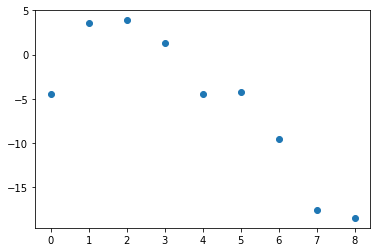

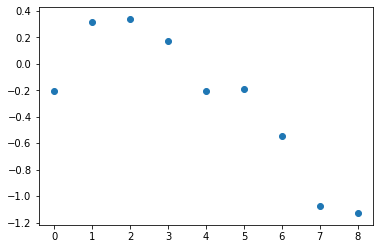

In [80]:
data = df_analisys_02.iloc[-9:,:]['MACDh_12_26_9'].tolist()
data.reverse()
plt.scatter(range(0,len(data)), data)
plt.show()

data = df_macdh_info_01.iloc[0,:][['ss1_macdh_' + str(x) for x in range(1,10) ]]
plt.scatter(range(0,len(data)), data)
plt.show()

In [81]:
# Create variable names lists to naming columns

ls_ss1vars = ['ss1_macdh_' + str(x) for x in range(100,8,-1)]
ls_ss1vars

ls_ss1vars2 = ['ss1_macdh_' + str(x) for x in range(8,0,-1) ]
ls_ss1vars2

ls_slopevars = ['slope_macdh_' + str(x) for x in range(0,4) ]
ls_slopevars


['slope_macdh_0', 'slope_macdh_1', 'slope_macdh_2', 'slope_macdh_3']

In [82]:
#Assigns correct format to variable to apply transformations
df_macdh_info_01[ls_ss1vars2] = df_macdh_info_01[ls_ss1vars2].astype(float)
df_macdh_info_01[ls_ss1vars] = df_macdh_info_01[ls_ss1vars].astype(float)
df_macdh_info_01[ls_slopevars] = df_macdh_info_01[ls_slopevars].astype(float)

In [83]:
df_macdh_info_01 = df_macdh_info_01[df_macdh_info_01.notna().all(axis=1)]

df_macdh_info_01[ls_slopevars + ls_ss1vars2 + ls_ss1vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 1701
Columns: 104 entries, slope_macdh_0 to ss1_macdh_9
dtypes: float64(104)
memory usage: 1.4 MB


In [84]:
#Defines X vector to all process

X = df_macdh_info_01[ls_slopevars + ls_ss1vars2 + ls_ss1vars]
print(X.shape)

#y = df_analysis_01[Target_desc]
#y = df_analysis_02[Target_desc + '_coded']
#print(y.shape)

(1702, 104)


In [85]:
# Defines the column trasformer
# This will be the standard schema : start with the pipeline for column transformers and then fit the model

#First a lil pip to treat imputation and scalation in one shot for numerical variables


pca_pip = Pipeline(steps=[('pca',PCA(n_components=3)),])


# Defines the column transformer
rf_transformer = ColumnTransformer([("passthrough", "passthrough", ls_slopevars + ls_ss1vars2),
                                     ("pca1", pca_pip, ls_ss1vars),
                                        ]) 

#Prepares pip
pip = Pipeline([('preprocessing', rf_transformer),])


#Fits the pipeline to the data
Xtr = rf_transformer.fit_transform(X)

#Saves the total procedure
#pickle.dump(kmeans_proc, open( DIRECTORY + 'kmeans_proc.pkl', 'wb'))

In [86]:
Xtr.shape

(1702, 15)

In [88]:
#Defines the df of all transformations

ls_ss1pcavars = ['ss1_macdh_c1','ss1_macdh_c2','ss1_macdh_c3']

df_macdh_info_tr_01 = pd.DataFrame(Xtr,columns=ls_slopevars + ls_ss1vars2 + ls_ss1pcavars)
print(df_macdh_info_tr_01.shape)
df_macdh_info_tr_01

(1702, 15)


,slope_macdh_0,slope_macdh_1,slope_macdh_2,slope_macdh_3,ss1_macdh_8,ss1_macdh_7,ss1_macdh_6,ss1_macdh_5,ss1_macdh_4,ss1_macdh_3,ss1_macdh_2,ss1_macdh_1,ss1_macdh_c1,ss1_macdh_c2,ss1_macdh_c3
0,-0.273730,0.014252,0.146636,0.033162,-1.072009,-0.542753,-0.190399,-0.205552,0.170558,0.338896,0.319107,-0.208565,-2.831107,0.370864,-4.975125
1,0.074288,0.156374,0.229934,0.015290,-1.131464,-1.075192,-0.545841,-0.193423,-0.208578,0.167600,0.335969,0.316176,-2.930615,0.038478,-4.459922
2,0.272394,0.212558,0.194846,-0.017737,-0.649703,-1.129885,-1.073588,-0.544002,-0.191427,-0.206590,0.169755,0.338199,-3.019554,-0.340744,-3.800619
3,0.180687,0.282560,0.106350,-0.064505,-0.309125,-0.647600,-1.128036,-1.071710,-0.541842,-0.189080,-0.204251,0.172295,-3.080005,-0.752883,-3.029093
4,0.168811,0.273045,-0.006028,-0.119313,0.010033,-0.306321,-0.644826,-1.125307,-1.068975,-0.539059,-0.186265,-0.201437,-3.087839,-1.197941,-2.147393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,0.158577,-0.091344,-0.137675,-0.146185,-0.460527,-0.561033,-0.529989,-0.826906,-1.037107,-1.369963,-1.498747,-1.052808,-0.689477,-5.831320,1.140125
1698,-0.227696,-0.244701,-0.168037,-0.164513,-0.336895,-0.445251,-0.544397,-0.513773,-0.806673,-1.014029,-1.342380,-1.469421,0.147037,-5.909550,1.808275
1699,-0.267584,-0.209411,-0.161168,-0.157731,-0.039883,-0.335883,-0.444129,-0.543175,-0.512582,-0.805186,-1.012333,-1.340353,0.946245,-5.954156,2.445289
1700,-0.249995,-0.139909,-0.139637,-0.145421,0.025639,-0.040265,-0.336407,-0.444705,-0.543798,-0.513190,-0.805935,-1.013181,1.728322,-5.898370,3.015081


In [89]:
# Concat the Datetime to the transformed data

df_macdh_info_tr_01 = pd.concat([df_macdh_info_01['date'],df_macdh_info_tr_01],axis=1)
df_macdh_info_tr_01

,date,slope_macdh_0,slope_macdh_1,slope_macdh_2,slope_macdh_3,ss1_macdh_8,ss1_macdh_7,ss1_macdh_6,ss1_macdh_5,ss1_macdh_4,ss1_macdh_3,ss1_macdh_2,ss1_macdh_1,ss1_macdh_c1,ss1_macdh_c2,ss1_macdh_c3
0,2022-03-07,-0.273730,0.014252,0.146636,0.033162,-1.072009,-0.542753,-0.190399,-0.205552,0.170558,0.338896,0.319107,-0.208565,-2.831107,0.370864,-4.975125
1,2022-03-04,0.074288,0.156374,0.229934,0.015290,-1.131464,-1.075192,-0.545841,-0.193423,-0.208578,0.167600,0.335969,0.316176,-2.930615,0.038478,-4.459922
2,2022-03-03,0.272394,0.212558,0.194846,-0.017737,-0.649703,-1.129885,-1.073588,-0.544002,-0.191427,-0.206590,0.169755,0.338199,-3.019554,-0.340744,-3.800619
3,2022-03-02,0.180687,0.282560,0.106350,-0.064505,-0.309125,-0.647600,-1.128036,-1.071710,-0.541842,-0.189080,-0.204251,0.172295,-3.080005,-0.752883,-3.029093
4,2022-03-01,0.168811,0.273045,-0.006028,-0.119313,0.010033,-0.306321,-0.644826,-1.125307,-1.068975,-0.539059,-0.186265,-0.201437,-3.087839,-1.197941,-2.147393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,2015-06-10,0.158577,-0.091344,-0.137675,-0.146185,-0.460527,-0.561033,-0.529989,-0.826906,-1.037107,-1.369963,-1.498747,-1.052808,-0.689477,-5.831320,1.140125
1698,2015-06-09,-0.227696,-0.244701,-0.168037,-0.164513,-0.336895,-0.445251,-0.544397,-0.513773,-0.806673,-1.014029,-1.342380,-1.469421,0.147037,-5.909550,1.808275
1699,2015-06-08,-0.267584,-0.209411,-0.161168,-0.157731,-0.039883,-0.335883,-0.444129,-0.543175,-0.512582,-0.805186,-1.012333,-1.340353,0.946245,-5.954156,2.445289
1700,2015-06-05,-0.249995,-0.139909,-0.139637,-0.145421,0.025639,-0.040265,-0.336407,-0.444705,-0.543798,-0.513190,-0.805935,-1.013181,1.728322,-5.898370,3.015081


In [90]:
pd.concat([df_macdh_info_tr_01[['date'] +ls_ss1vars2].iloc[0:1,:],
           df_macdh_info_tr_01[['date'] +ls_ss1vars2].iloc[0:1,:]],axis=0)

,date,ss1_macdh_8,ss1_macdh_7,ss1_macdh_6,ss1_macdh_5,ss1_macdh_4,ss1_macdh_3,ss1_macdh_2,ss1_macdh_1
0,2022-03-07,-1.072009,-0.542753,-0.190399,-0.205552,0.170558,0.338896,0.319107,-0.208565
0,2022-03-07,-1.072009,-0.542753,-0.190399,-0.205552,0.170558,0.338896,0.319107,-0.208565


# VOLUME DATA

In [91]:
# Prepares previos MACD H info as input variables

for i in range(0,len(df_analisys_02)):
#for i in range(0,1):
    
    ###############################################################################################
    nro_close_lag = 100

    if i==0:
        X = df_analisys_02.iloc[-(nro_close_lag + i):,][['Volume']]
        date = df_analisys_02.iloc[-1:,]['date'].iloc[0]
    else:
        X = df_analisys_02.iloc[-(nro_close_lag + i):-i,][['Volume']]
        date = df_analisys_02.iloc[-(i+1):,]['date'].iloc[0]
        
    if X.loc[max(X.index)][0] == 0:
        X.loc[max(X.index)][0] = X.loc[max(X.index)-1][0]

    # define standard scaler
    sscaler = StandardScaler()

    # transform data
    X_ss1 = sscaler.fit_transform(X)
    #print(X2)

    # Obtains the df of variables of close lags
    ls_columns = ['ss1_vols_' + str(x) for x in range(len(X_ss1),0,-1) ]
    df_ssdata1 = pd.DataFrame(X_ss1.T,columns=ls_columns)
    ###############################################################################################

    
    ###############################################################################################
    #Computes slopes before the last close
    ls_linreg_coefs = []
    
    for j in [3,5,8,13]:
        y = X_ss1[-j:]
        x = np.array([range(0,j)]).reshape(-1,1)


        linreg = LinearRegression()
        
        try:
            linreg.fit(x,y)
            linreg_coef = linreg.coef_[0][0]

            ls_linreg_coefs.append(linreg_coef)
            
        except:
            pass

    ls_columns = ['slope_vols_' + str(x) for x in range(0,len(ls_linreg_coefs)) ]

    df_linregcoefs = pd.DataFrame(np.array([ls_linreg_coefs]),columns=ls_columns)
    df_linregcoefs
    ###############################################################################################

    # Joins the ss closes df with the slopes df
    df_vols_info = pd.concat([df_ssdata1,df_linregcoefs],axis=1,sort=False)
    df_vols_info['date'] = date
    
    if i == 0:
        df_vols_info_01 = df_vols_info.copy()
    else:
        df_vols_info_01 = df_vols_info_01.append(df_vols_info,sort=False).copy()
        
df_vols_info_01 = df_vols_info_01.reset_index(drop=True)
df_vols_info_01

,ss1_vols_100,ss1_vols_99,ss1_vols_98,ss1_vols_97,ss1_vols_96,ss1_vols_95,ss1_vols_94,ss1_vols_93,ss1_vols_92,ss1_vols_91,...,ss1_vols_5,ss1_vols_4,ss1_vols_3,ss1_vols_2,ss1_vols_1,slope_vols_0,slope_vols_1,slope_vols_2,slope_vols_3,date
0,-0.762191,-1.194952,-0.649093,-1.132955,-1.365453,-1.151240,-0.624077,-0.554082,-0.268057,-0.853706,...,1.913290,1.500720,0.971085,1.728381,0.059782,-0.455652,-0.347935,-0.182111,0.066642,2022-03-07
1,-1.225561,-0.743422,-1.172896,-0.631183,-1.111369,-1.342101,-1.129515,-0.606358,-0.536894,-0.253042,...,1.782394,1.911733,1.502298,0.976687,1.728229,0.112965,-0.104338,0.029794,0.141992,2022-03-04
2,-1.247427,-1.204472,-0.718753,-1.151415,-0.605682,-1.089432,-1.321877,-1.107713,-0.580672,-0.510693,...,0.830554,1.825812,1.956111,1.543637,1.014124,-0.470994,0.008496,0.051457,0.149270,2022-03-03
3,-1.484881,-1.214734,-1.172038,-0.689244,-1.119301,-0.576854,-1.057691,-1.288736,-1.075861,-0.551994,...,2.562800,0.850733,1.839997,1.969512,1.559521,-0.140238,-0.088778,0.150457,0.139460,2022-03-02
4,-0.416850,-1.481997,-1.208709,-1.165517,-0.677110,-1.112167,-0.563413,-1.049840,-1.283572,-1.068222,...,0.685229,2.612740,0.880770,1.881535,2.012555,0.565892,0.192344,0.223796,0.095988,2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.865489,0.162619,1.008277,0.690555,0.004039,-0.502119,0.426699,NaN,NaN,2015-01-16
1797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.667645,0.146354,0.902735,0.618556,0.236101,NaN,NaN,NaN,2015-01-15
1798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.355014,0.326862,1.028152,1.191583,NaN,NaN,NaN,2015-01-14
1799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.000000,1.000000,NaN,NaN,NaN,NaN,2015-01-13


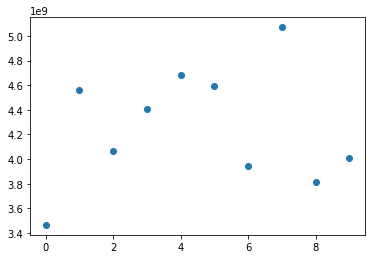

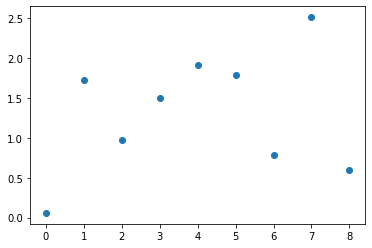

ss1_vols_1    0.059782
ss1_vols_2    1.728381
ss1_vols_3    0.971085
ss1_vols_4     1.50072
ss1_vols_5     1.91329
ss1_vols_6     1.78296
ss1_vols_7    0.787474
ss1_vols_8     2.51031
ss1_vols_9    0.592964
Name: 0, dtype: object

In [92]:
data = df_analisys_02.iloc[-10:,:]['Volume'].tolist()
data.reverse()
plt.scatter(range(0,len(data)), data)
plt.show()

data = df_vols_info_01.iloc[0,:][['ss1_vols_' + str(x) for x in range(1,10) ]]
plt.scatter(range(0,len(data)), data)
plt.show()

data

In [93]:
# Create variable names lists to naming columns

ls_ss1vars = ['ss1_vols_' + str(x) for x in range(100,8,-1)]
ls_ss1vars

ls_ss1vars2 = ['ss1_vols_' + str(x) for x in range(8,0,-1) ]
ls_ss1vars2

ls_slopevars = ['slope_vols_' + str(x) for x in range(0,4) ]
ls_slopevars

['slope_vols_0', 'slope_vols_1', 'slope_vols_2', 'slope_vols_3']

In [94]:
#Assigns correct format to variable to apply transformations

df_vols_info_01[ls_ss1vars2] = df_vols_info_01[ls_ss1vars2].astype(float)
df_vols_info_01[ls_ss1vars] = df_vols_info_01[ls_ss1vars].astype(float)
df_vols_info_01[ls_slopevars] = df_vols_info_01[ls_slopevars].astype(float)

In [95]:
df_vols_info_01 = df_vols_info_01[df_vols_info_01.notna().all(axis=1)]
df_vols_info_01 = df_vols_info_01.reset_index(drop=True)
print(df_vols_info_01.shape)

df_vols_info_01[ls_slopevars + ls_ss1vars2 + ls_ss1vars].info()



(1702, 105)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702 entries, 0 to 1701
Columns: 104 entries, slope_vols_0 to ss1_vols_9
dtypes: float64(104)
memory usage: 1.4 MB


In [96]:
#Defines X vector to all process

X = df_vols_info_01[ls_slopevars + ls_ss1vars2 + ls_ss1vars]
print(X.shape)


(1702, 104)


In [97]:
# Defines the column trasformer
# This will be the standard schema : start with the pipeline for column transformers and then fit the model

#First a lil pip to treat imputation and scalation in one shot for numerical variables


pca_pip = Pipeline(steps=[('pca',PCA(n_components=3)),])


# Defines the column transformer
rf_transformer = ColumnTransformer([("passthrough", "passthrough", ls_slopevars + ls_ss1vars2),
                                     ("pca1", pca_pip, ls_ss1vars),
                                        ]) 

#Prepares pip
pip = Pipeline([('preprocessing', rf_transformer),])


#Fits the pipeline to the data
Xtr = rf_transformer.fit_transform(X)

#Saves the total procedure
#pickle.dump(kmeans_proc, open( DIRECTORY + 'kmeans_proc.pkl', 'wb'))

In [98]:
Xtr.shape

(1702, 15)

In [99]:
#Defines the df of all transformations

ls_ss1pcavars = ['ss1_vols_c1','ss1_vols_c2','ss1_vols_c3']

df_vols_info_tr_01 = pd.DataFrame(Xtr,columns=ls_slopevars + ls_ss1vars2 + ls_ss1pcavars)
print(df_vols_info_tr_01.shape)
df_vols_info_tr_01

(1702, 15)


,slope_vols_0,slope_vols_1,slope_vols_2,slope_vols_3,ss1_vols_8,ss1_vols_7,ss1_vols_6,ss1_vols_5,ss1_vols_4,ss1_vols_3,ss1_vols_2,ss1_vols_1,ss1_vols_c1,ss1_vols_c2,ss1_vols_c3
0,-0.455652,-0.347935,-0.182111,0.066642,2.510310,0.787474,1.782960,1.913290,1.500720,0.971085,1.728381,0.059782,3.632085,-1.875724,-0.672532
1,0.112965,-0.104338,0.029794,0.141992,0.601438,2.504218,0.794470,1.782394,1.911733,1.502298,0.976687,1.728229,3.695781,-1.757529,-0.383869
2,-0.470994,0.008496,0.051457,0.149270,0.931266,0.636090,2.552994,0.830554,1.825812,1.956111,1.543637,1.014124,3.771466,-1.588205,-0.051029
3,-0.140238,-0.088778,0.150457,0.139460,0.743894,0.950838,0.657440,2.562800,0.850733,1.839997,1.969512,1.559521,3.871243,-1.350577,0.357059
4,0.565892,0.192344,0.223796,0.095988,0.350997,0.772689,0.982039,0.685229,2.612740,0.880770,1.881535,2.012555,3.928848,-1.216309,0.765943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,0.561347,0.049551,0.060206,0.026023,-1.028353,-0.943355,-0.829024,-0.603049,-0.504503,-1.241885,-0.976708,-0.119191,-3.757659,-2.755433,-2.725044
1698,-0.232312,-0.091920,-0.159749,0.008484,1.003556,-1.031002,-0.947370,-0.834874,-0.612528,-0.515564,-1.241106,-0.980187,-4.041413,-2.823593,-2.323311
1699,-0.309716,-0.026426,-0.084592,0.022548,-1.114094,0.959522,-1.045429,-0.963014,-0.852155,-0.633044,-0.537491,-1.252476,-4.069326,-2.962604,-1.745237
1700,0.157179,0.134453,-0.013957,0.026994,-0.816154,-1.139042,0.932553,-1.070444,-0.988109,-0.877359,-0.658461,-0.563001,-4.098690,-3.025844,-1.155940


In [100]:
# Concat the Datetime to the transformed data

df_vols_info_tr_01 = pd.concat([df_vols_info_01['date'],df_vols_info_tr_01],axis=1)
df_vols_info_tr_01

,date,slope_vols_0,slope_vols_1,slope_vols_2,slope_vols_3,ss1_vols_8,ss1_vols_7,ss1_vols_6,ss1_vols_5,ss1_vols_4,ss1_vols_3,ss1_vols_2,ss1_vols_1,ss1_vols_c1,ss1_vols_c2,ss1_vols_c3
0,2022-03-07,-0.455652,-0.347935,-0.182111,0.066642,2.510310,0.787474,1.782960,1.913290,1.500720,0.971085,1.728381,0.059782,3.632085,-1.875724,-0.672532
1,2022-03-04,0.112965,-0.104338,0.029794,0.141992,0.601438,2.504218,0.794470,1.782394,1.911733,1.502298,0.976687,1.728229,3.695781,-1.757529,-0.383869
2,2022-03-03,-0.470994,0.008496,0.051457,0.149270,0.931266,0.636090,2.552994,0.830554,1.825812,1.956111,1.543637,1.014124,3.771466,-1.588205,-0.051029
3,2022-03-02,-0.140238,-0.088778,0.150457,0.139460,0.743894,0.950838,0.657440,2.562800,0.850733,1.839997,1.969512,1.559521,3.871243,-1.350577,0.357059
4,2022-03-01,0.565892,0.192344,0.223796,0.095988,0.350997,0.772689,0.982039,0.685229,2.612740,0.880770,1.881535,2.012555,3.928848,-1.216309,0.765943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,2015-06-10,0.561347,0.049551,0.060206,0.026023,-1.028353,-0.943355,-0.829024,-0.603049,-0.504503,-1.241885,-0.976708,-0.119191,-3.757659,-2.755433,-2.725044
1698,2015-06-09,-0.232312,-0.091920,-0.159749,0.008484,1.003556,-1.031002,-0.947370,-0.834874,-0.612528,-0.515564,-1.241106,-0.980187,-4.041413,-2.823593,-2.323311
1699,2015-06-08,-0.309716,-0.026426,-0.084592,0.022548,-1.114094,0.959522,-1.045429,-0.963014,-0.852155,-0.633044,-0.537491,-1.252476,-4.069326,-2.962604,-1.745237
1700,2015-06-05,0.157179,0.134453,-0.013957,0.026994,-0.816154,-1.139042,0.932553,-1.070444,-0.988109,-0.877359,-0.658461,-0.563001,-4.098690,-3.025844,-1.155940


In [101]:
pd.concat([df_vols_info_tr_01[['date'] +ls_ss1vars2].iloc[0:1,:],
           df_vols_info_01[['date'] +ls_ss1vars2].iloc[0:1,:]],axis=0)

,date,ss1_vols_8,ss1_vols_7,ss1_vols_6,ss1_vols_5,ss1_vols_4,ss1_vols_3,ss1_vols_2,ss1_vols_1
0,2022-03-07,2.51031,0.787474,1.78296,1.91329,1.50072,0.971085,1.728381,0.059782
0,2022-03-07,2.51031,0.787474,1.78296,1.91329,1.50072,0.971085,1.728381,0.059782


# Attaches target variable to the df with transformations

In [173]:
ls_tgcols = ['date','Close','target_order','target_order_bin','target_close','target_difference','target_date','target_date_diff']


df_transformations_100 = pd.merge(df_close_info_tr_01,
                           df_macdh_info_tr_01,
                           on = ['date'],
                           how='inner'
                         ).copy()


df_transformations_100 = pd.merge(df_transformations_100,
                           df_vols_info_tr_01,
                           on = ['date'],
                           how='inner'
                         ).copy()

df_analisys_100 = pd.merge(df_transformations_100,
                           df_analisys_02[ls_tgcols],
                           on = ['date'],
                           how='inner'
                         ).copy()


df_analisys_100 = df_analisys_100.sort_values(['date']).reset_index(drop=True)

print(df_analisys_100.shape)

df_analisys_100


(1702, 53)


,date,slope_close_0,slope_close_1,slope_close_2,slope_close_3,ss1_close_8,ss1_close_7,ss1_close_6,ss1_close_5,ss1_close_4,...,ss1_vols_c1,ss1_vols_c2,ss1_vols_c3,Close,target_order,target_order_bin,target_close,target_difference,target_date,target_date_diff
0,2015-06-04,-0.206750,-0.062384,-0.048224,-0.068024,0.627140,1.206523,1.125688,0.723001,0.853424,...,-3.985897,-2.874068,-0.466440,2095.840088,SELL2,0,2035.729980,-60.0,2015-08-20,77.0
1,2015-06-05,-0.323530,-0.157073,-0.116558,-0.079920,1.203446,1.121499,0.713274,0.845491,0.780606,...,-4.098690,-3.025844,-1.155940,2092.830078,SELL2,0,1970.890015,-122.0,2015-08-21,77.0
2,2015-06-08,-0.256720,-0.253867,-0.150066,-0.101781,1.123956,0.708489,0.843052,0.777015,0.915606,...,-4.069326,-2.962604,-1.745237,2079.280029,SELL2,0,1970.890015,-108.0,2015-08-21,74.0
3,2015-06-09,-0.201879,-0.268745,-0.159765,-0.118540,0.705680,0.843876,0.776057,0.918388,0.337916,...,-4.041413,-2.823593,-2.323311,2080.149902,SELL2,0,1970.890015,-109.0,2015-08-21,73.0
4,2015-06-10,0.431196,0.020094,-0.118962,-0.096313,0.844327,0.773463,0.922185,0.315649,0.215501,...,-3.757659,-2.755433,-2.725044,2105.199951,SELL2,0,2035.729980,-69.0,2015-08-20,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,2022-03-01,-0.284318,0.178997,-0.007753,-0.103633,-1.393364,-1.621062,-1.941035,-2.515980,-2.057530,...,3.928848,-1.216309,0.765943,4306.259766,BUY,1,4386.540039,80.0,2022-03-02,1.0
1698,2022-03-02,0.045643,0.084975,0.070074,-0.065114,-1.618088,-1.937663,-2.511893,-2.054013,-1.358867,...,3.871243,-1.350577,0.357059,4386.540039,SELL,0,4201.089844,-185.0,2022-03-07,5.0
1699,2022-03-03,0.206727,-0.021470,0.108218,-0.051213,-1.930161,-2.502764,-2.046182,-1.353005,-1.430378,...,3.771466,-1.588205,-0.051029,4363.490234,SELL,0,4201.089844,-162.0,2022-03-07,4.0
1700,2022-03-04,-0.207522,-0.023684,0.088722,-0.048085,-2.490920,-2.036074,-1.345534,-1.422612,-1.909700,...,3.695781,-1.757529,-0.383869,4328.870117,SELL,0,4201.089844,-128.0,2022-03-07,3.0


In [174]:
print(min(df_analisys_100['date']))
print(max(df_analisys_100['date']))

2015-06-04
2022-03-07


In [175]:
print(df_analisys_100['target_order'].value_counts(dropna=False).reset_index().sort_values(['index'],ascending = True))


   index  target_order
0    BUY           536
1   BUY2           505
4   NULL             1
2   SELL           404
3  SELL2           256


In [176]:
# SAVING POINT

DIR_OUTPUTS = r'C:\Users\willi\Documents\EJERCICIOS\TRADING\outputs/'

df_analisys_100.to_pickle(DIR_OUTPUTS + 'df_spx500_1d_s1' + '.pkl')
print(df_analisys_100.shape)
print(dt.datetime.now())

(1702, 53)
2022-03-07 19:56:48.620659
